In [6]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from datetime import datetime

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

airp = pd.read_csv('AirPassengers.csv')
airp.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
airp.dtypes

Month          object
#Passengers     int64
dtype: object

In [13]:
# Convertendo para datas com lambda
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', # Base
                   parse_dates=['Month'], # O que vai ser trans
                   index_col='Month', # index  vira o mes
                   date_parser = dateparse # expressao que trans
                  )

In [14]:
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [33]:
# Criação da Time Series
ts=base['#Passengers']

#vendo um valor por index
print(ts[1]);

#vendo pela data
print(ts['1959-01']);

#Vendo por data específica
print(ts[datetime(1949, 2, 1)])

118
Month
1959-01-01    360
Name: #Passengers, dtype: int64
118


In [34]:
# Intervalo de datas
print(ts['1950-01' : '1950-07-01' ])

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64


In [36]:
ts[:'1950']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [37]:
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [38]:
ts.index.min()

Timestamp('1949-01-01 00:00:00')

In [41]:
ts['1960']

Month
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

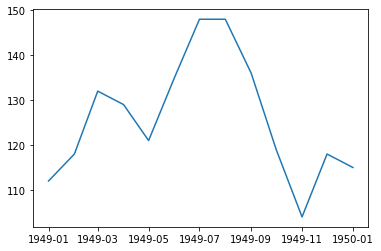

In [62]:
# Exemplo de plot por ano
plt.plot(ts['1949-01-01': '1950-01-01'])

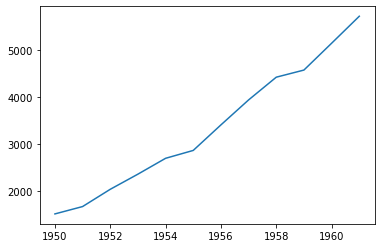

In [53]:
# Vendo as somas por ano
ano = ts.resample('A').sum()
plt.plot(ano);

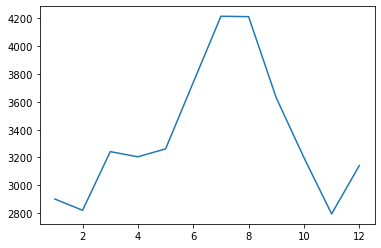

In [60]:
# Visualização por mês - Lambda pra retornar a soma dos meses
mes = ts.groupby(lambda x : x.month).sum()
plt.plot(mes)